In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("internflare_dataset.csv")
df.head()

,Partner_ID,Partner_Name,Intern_ID,Intern_Name,Intern_Assigned_To,Service_Type,Fee_Charged,Payment_Status,Country,Start_Date,End_Date,Intern_Hours,Feedback_Rating
0,P001,CloudSoft,I1000,Nathan Stevens,CloudSoft,Branding,799USD,Paid,Nigeria,2025-04-02,2025-08-28,398.0,3
1,P005,CloudSoft,I1001,Mario Alvarez,CloudSoft,Masterclass,1621,Pending,United States,2024-08-26,2025-06-25,91.0,bad
2,P003,Alpha Tech,I1002,Shane Fuller,Alpha Tech,Masterclass,$1718,Failed,Canda,2025-05-18,2025-12-15,88.0,4
3,P008,EcoTrans,I1003,Nicholas West,EcoTrans,Analytics,USD995,Paid,Canda,2025-04-24,2025-11-22,NaN,4
4,P004,Betta Ltd.,I1004,Matthew Harper,Betta Ltd.,Web Dev,$1568,Fail,Nigeria,2023-10-06,2025-07-21,686.0,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Partner_ID          3000 non-null   object 
 1   Partner_Name        3000 non-null   object 
 2   Intern_ID           3000 non-null   object 
 3   Intern_Name         2863 non-null   object 
 4   Intern_Assigned_To  3000 non-null   object 
 5   Service_Type        3000 non-null   object 
 6   Fee_Charged         3000 non-null   object 
 7   Payment_Status      3000 non-null   object 
 8   Country             3000 non-null   object 
 9   Start_Date          3000 non-null   object 
 10  End_Date            3000 non-null   object 
 11  Intern_Hours        1940 non-null   float64
 12  Feedback_Rating     2694 non-null   object 
dtypes: float64(1), object(12)
memory usage: 304.8+ KB


In [4]:
df.describe()

,Intern_Hours
count,1940.000000
mean,559.065464
std,358.169634
min,10.000000
25%,237.750000
50%,482.500000
75%,876.000000
max,1200.000000


 ## DATA CLEANING TASKS:
 •- Remove duplicates (e.g., partners appearing under slightly different names).
 
 •- Standardize country names (Nigeria, USA, UK, Canada, Germany).
 
 •- Clean up the 'Fee_Charged' column (ensure numeric values in USD).
 
 •- Fix inconsistent payment status (Paid, Pending, Failed).
 
 •- Handle missing values in intern names and hours.
 
 •- Convert Feedback_Rating to numeric scores (map words like 'Good' = 4, 'bad' = 2)

## 1. Remove duplicates

In [5]:
df = df.drop_duplicates()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Partner_ID          3000 non-null   object 
 1   Partner_Name        3000 non-null   object 
 2   Intern_ID           3000 non-null   object 
 3   Intern_Name         2863 non-null   object 
 4   Intern_Assigned_To  3000 non-null   object 
 5   Service_Type        3000 non-null   object 
 6   Fee_Charged         3000 non-null   object 
 7   Payment_Status      3000 non-null   object 
 8   Country             3000 non-null   object 
 9   Start_Date          3000 non-null   object 
 10  End_Date            3000 non-null   object 
 11  Intern_Hours        1940 non-null   float64
 12  Feedback_Rating     2694 non-null   object 
dtypes: float64(1), object(12)
memory usage: 304.8+ KB


In [7]:
df["Country"].unique()

array(['Nigeria', 'United States', 'Canda', 'Germany', 'Canada', 'Naija',
       'Nig', 'UK', 'U.K.', 'USA'], dtype=object)

## 2. Standardize country names (Nigeria, USA, UK, Canada, Germany).

In [8]:
Country_map = {'Nig': 'Nigeria','UK':'UK','U.K.':'UK','United States':'USA','Naija':'Nigeria','Canda':'Canada'}

In [9]:
df['Country'] = df['Country'].replace(Country_map)

In [10]:
df['Country'].unique()

array(['Nigeria', 'USA', 'Canada', 'Germany', 'UK'], dtype=object)

## 3. Clean up the 'Fee_Charged' column (ensure numeric values in USD).

In [11]:
df[['Fee_Charged']]

,Fee_Charged
0,799USD
1,1621
2,$1718
3,USD995
4,$1568
...,...
2995,1329
2996,1558
2997,USD1288
2998,1079USD


In [12]:
# Extract only the numeric part
df['Fee_Charged'] = df['Fee_Charged'].astype(str).str.extract('(\d+)').astype(float)

df[['Fee_Charged']]

,Fee_Charged
0,799.0
1,1621.0
2,1718.0
3,995.0
4,1568.0
...,...
2995,1329.0
2996,1558.0
2997,1288.0
2998,1079.0


## 4. Fix inconsistent payment status (Paid, Pending, Failed).

In [13]:
df['Payment_Status'].unique()

array(['Paid', 'Pending', 'Failed', 'Fail', 'Pendig'], dtype=object)

In [13]:
df['Payment_Status'] = df['Payment_Status'].str.capitalize()
df['Payment_Status'] = df['Payment_Status'].replace({'Pending': 'Pending', 'paid': 'Paid', 'Failed': 'Failed','Fail':'Failed','Pendig':'Pending'})
df[['Payment_Status']]

,Payment_Status
0,Paid
1,Pending
2,Failed
3,Paid
4,Failed
...,...
2995,Failed
2996,Failed
2997,Pending
2998,Pending


## 5. Handle missing values in intern names and hours.

In [14]:
df['Intern_Name'].isnull().sum()

137

In [15]:
df['Intern_Name'] = df['Intern_Name'].fillna('Unknown')

In [16]:
df['Intern_Name'].isnull().sum()

0

In [17]:
# Intern_Hours

df['Intern_Hours'].isnull().sum()

1060

count    1940.000000
mean      559.065464
std       358.169634
min        10.000000
25%       237.750000
50%       482.500000
75%       876.000000
max      1200.000000
Name: Intern_Hours, dtype: float64


<Axes: >

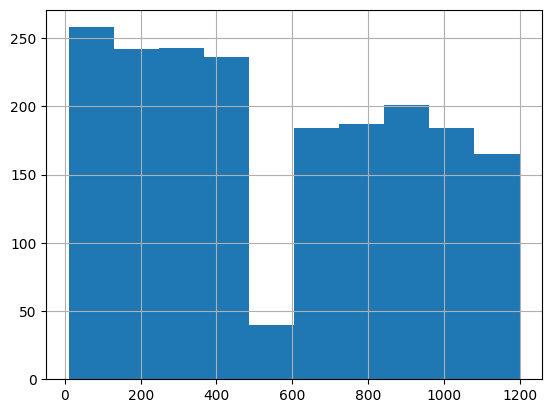

In [18]:
print(df['Intern_Hours'].describe())
df['Intern_Hours'].hist()


In [19]:
median_hours = df['Intern_Hours'].median()
df['Intern_Hours'] = df['Intern_Hours'].fillna(median_hours)


In [20]:
df['Intern_Hours'].isnull().sum()

0

## 6. Convert Feedback_Rating to numeric scores (map words like 'Good' = 4, 'bad' = 2)

In [21]:
df['Feedback_Rating'].unique()

array(['3', 'bad', '4', '5', '1', 'Good', 'poor', 'excellent', nan, '2'],
      dtype=object)

In [22]:
rating_map ={
    'excellent': 5,
    'Good': 4,
    'good': 4,      
    '3': 3,
    'Average': 3,   
    'bad': 2,
    'poor': 1,
    '1': 1,
    '2': 2,
    '4': 4,
    '5': 5
}


In [23]:
df['Feedback_Rating'] = df['Feedback_Rating'].replace(rating_map)
df['Feedback_Rating'] = df['Feedback_Rating'].astype(float)


C:\Users\Adebayo.M\AppData\Local\Temp\ipykernel_7372\3200034000.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Feedback_Rating'] = df['Feedback_Rating'].replace(rating_map)


In [24]:
df['Feedback_Rating'].unique()

array([ 3.,  2.,  4.,  5.,  1., nan])

------------

 ## EXPLORATORY ANALYSIS:
 •- Count the total number of unique partners and interns.
 
 •- Calculate total revenue generated (after cleaning).
 
 •- Analyze revenue by service type.
 
 •- Identify top 5 countries by number of partners.
 
 •- Compute average feedback rating by service type

## 1. Count the total number of unique partners and interns.

In [25]:
num_partners = df['Partner_Name'].nunique()
num_interns = df['Intern_Name'].nunique()

print("Unique Partners:", num_partners)
print("Unique Interns:", num_interns)


Unique Partners: 10
Unique Interns: 2799


## 2. Calculate total revenue generated (after cleaning).

In [26]:
total_revenue = df['Fee_Charged'].sum()
print("Total Revenue: $", total_revenue)


Total Revenue: $ 3172192.0


## 3. Analyze revenue by service type

In [27]:
revenue_by_service = df.groupby('Service_Type')['Fee_Charged'].sum().sort_values(ascending=False)
print(revenue_by_service)


Service_Type
Branding           421014.0
Masterclass        411047.0
SEO                406286.0
Growth Strategy    402011.0
Social Media       401627.0
Cloud Migration    384797.0
Analytics          375667.0
Web Dev            369743.0
Name: Fee_Charged, dtype: float64


## 4.  Identify top 5 countries by number of partners.

In [28]:
df['Partner_Name'].unique()

array(['CloudSoft', 'Alpha Tech', 'EcoTrans', 'Betta Ltd.',
       'Skyline Inc.', 'InfinitX', 'TechBridge', 'Green Energy',
       'Nova Systems', 'DataCore'], dtype=object)

In [29]:
top_countries = (
    df.groupby('Country')['Partner_Name']
    .nunique()             
    .sort_values(ascending=False)  
    .head(5)               
)

print(top_countries)


Country
Canada     10
Germany    10
Nigeria    10
UK         10
USA        10
Name: Partner_Name, dtype: int64


## 5. Compute average feedback rating by service type

In [30]:
avg_feedback_service = df.groupby('Service_Type')['Feedback_Rating'].mean().sort_values(ascending=False)
print(avg_feedback_service)


Service_Type
Cloud Migration    3.108025
Masterclass        3.085470
Analytics          3.082540
Growth Strategy    3.068571
Web Dev            3.016393
SEO                2.955882
Social Media       2.927326
Branding           2.923288
Name: Feedback_Rating, dtype: float64


-------

##  ADVANCED ANALYSIS:
 •- Correlation between intern hours worked and feedback rating.
 
 •- Revenue trends per quarter over the dataset timeline.
 
 •- Which services bring the highest revenue and growth.
 
 •- Partner churn: partners who only engaged once vs repeated engagements.

## 1. Correlation between intern hours worked and feedback rating.

In [31]:
correlation = df[['Intern_Hours', 'Feedback_Rating']].corr()
print(correlation)


                 Intern_Hours  Feedback_Rating
Intern_Hours         1.000000        -0.054038
Feedback_Rating     -0.054038         1.000000


## 2.  Revenue trends per quarter over the dataset timeline.

In [32]:
# Convert columns to datetime
df['Start_Date'] = pd.to_datetime(df['Start_Date'], errors='coerce')
df['End_Date'] = pd.to_datetime(df['End_Date'], errors='coerce')



In [33]:
df['Txn_Date'] = df['Start_Date']


In [34]:
# Create quarter column
df['Quarter'] = df['Txn_Date'].dt.to_period('Q')

# Group revenue by quarter
revenue_trends = df.groupby('Quarter')['Fee_Charged'].sum().sort_index()

print(revenue_trends)


Quarter
2023Q3     48336.0
2023Q4    392588.0
2024Q1    405634.0
2024Q2    371082.0
2024Q3    399587.0
2024Q4    395371.0
2025Q1    411638.0
2025Q2    393484.0
2025Q3    354472.0
Freq: Q-DEC, Name: Fee_Charged, dtype: float64


## 3.  Which services bring the highest revenue and growth.

In [35]:
#highest Revenue by Service
service_revenue = (
    df.groupby('Service_Type')['Fee_Charged']
    .sum()
    .sort_values(ascending=False)
)

print(service_revenue)


Service_Type
Branding           421014.0
Masterclass        411047.0
SEO                406286.0
Growth Strategy    402011.0
Social Media       401627.0
Cloud Migration    384797.0
Analytics          375667.0
Web Dev            369743.0
Name: Fee_Charged, dtype: float64


In [36]:
# Group by quarter and service
service_growth = (
    df.groupby([df['Txn_Date'].dt.to_period('Q'), 'Service_Type'])['Fee_Charged']
    .sum()
    .unstack(fill_value=0)   # pivot table: quarters as rows, services as columns
)

print(service_growth)


Service_Type  Analytics  Branding  Cloud Migration  Growth Strategy  \
Txn_Date                                                              
2023Q3           5554.0     579.0           7173.0           5981.0   
2023Q4          32377.0   61925.0          43799.0          49002.0   
2024Q1          48736.0   55432.0          39920.0          59326.0   
2024Q2          33113.0   33489.0          40008.0          58423.0   
2024Q3          57667.0   52306.0          64036.0          45184.0   
2024Q4          53214.0   56061.0          55978.0          36520.0   
2025Q1          51282.0   52447.0          57895.0          54782.0   
2025Q2          48904.0   61835.0          35076.0          48150.0   
2025Q3          44820.0   46940.0          40912.0          44643.0   

Service_Type  Masterclass      SEO  Social Media  Web Dev  
Txn_Date                                                   
2023Q3             4042.0  12701.0        8692.0   3614.0  
2023Q4            54083.0  51479.0    

## 4. Partner churn: partners who only engaged once vs repeated engagements.

In [37]:
# Count how many times each partner engaged
partner_counts = df['Partner_Name'].value_counts()


In [38]:
#Split into one-time vs repeated
one_time_partners = partner_counts[partner_counts == 1].count()
repeat_partners   = partner_counts[partner_counts > 1].count()

print("One-time partners:", one_time_partners)
print("Repeat partners:", repeat_partners)


One-time partners: 0
Repeat partners: 10


## VISUALIZATIONS:
 •- Bar chart of total income by service type.
 
 •- Pie chart of payment status distribution.
 
 •- Line chart of revenue trends over time.
 
 •- Histogram of feedback ratings

In [39]:
import matplotlib.pyplot as plt

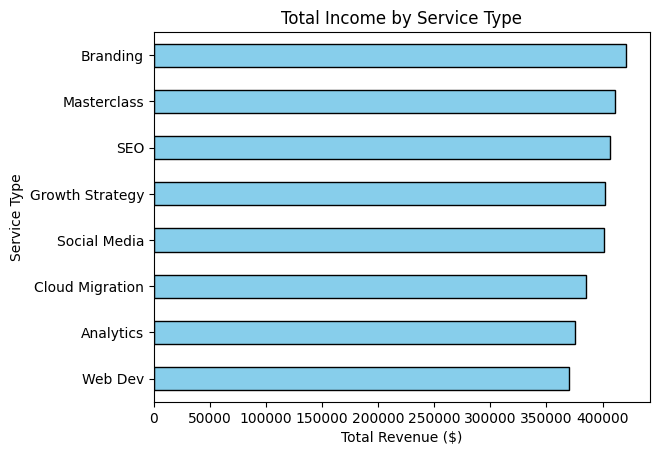

In [40]:
# Bar chart of total income by service type.
service_income = df.groupby('Service_Type')['Fee_Charged'].sum().sort_values()

service_income.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title("Total Income by Service Type")
plt.xlabel("Total Revenue ($)")
plt.ylabel("Service Type")
plt.show()

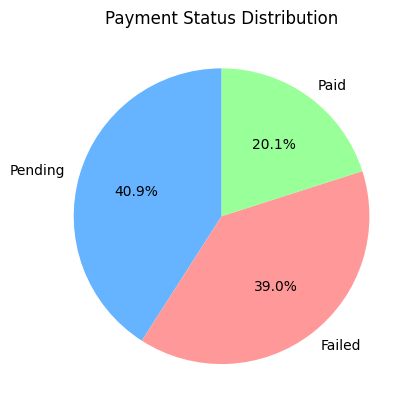

In [41]:
# Pie chart of payment status distribution.
payment_dist = df['Payment_Status'].value_counts()

payment_dist.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['#66b3ff','#ff9999','#99ff99']
)
plt.title("Payment Status Distribution")
plt.ylabel("")  # hide y-label
plt.show()


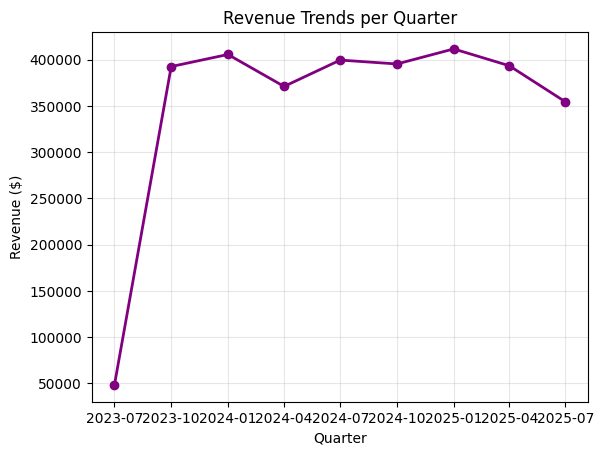

In [42]:
#  Line chart of revenue trends over time.
revenue_trends = df.groupby(df['Txn_Date'].dt.to_period('Q'))['Fee_Charged'].sum()
revenue_trends.index = revenue_trends.index.to_timestamp()

plt.plot(revenue_trends.index, revenue_trends.values, marker='o', linewidth=2, color='purple')
plt.title("Revenue Trends per Quarter")
plt.xlabel("Quarter")
plt.ylabel("Revenue ($)")
plt.grid(alpha=0.3)
plt.show()


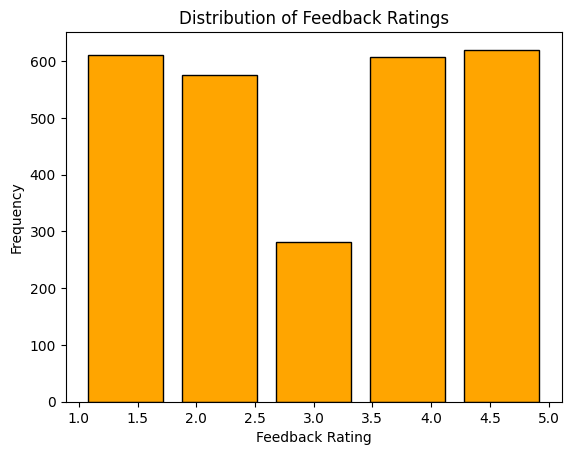

In [43]:
#  Histogram of feedback ratings
df['Feedback_Rating'].plot(
    kind='hist', 
    bins=5, 
    rwidth=0.8, 
    color='orange', 
    edgecolor='black'
)
plt.title("Distribution of Feedback Ratings")
plt.xlabel("Feedback Rating")
plt.ylabel("Frequency")
plt.show()


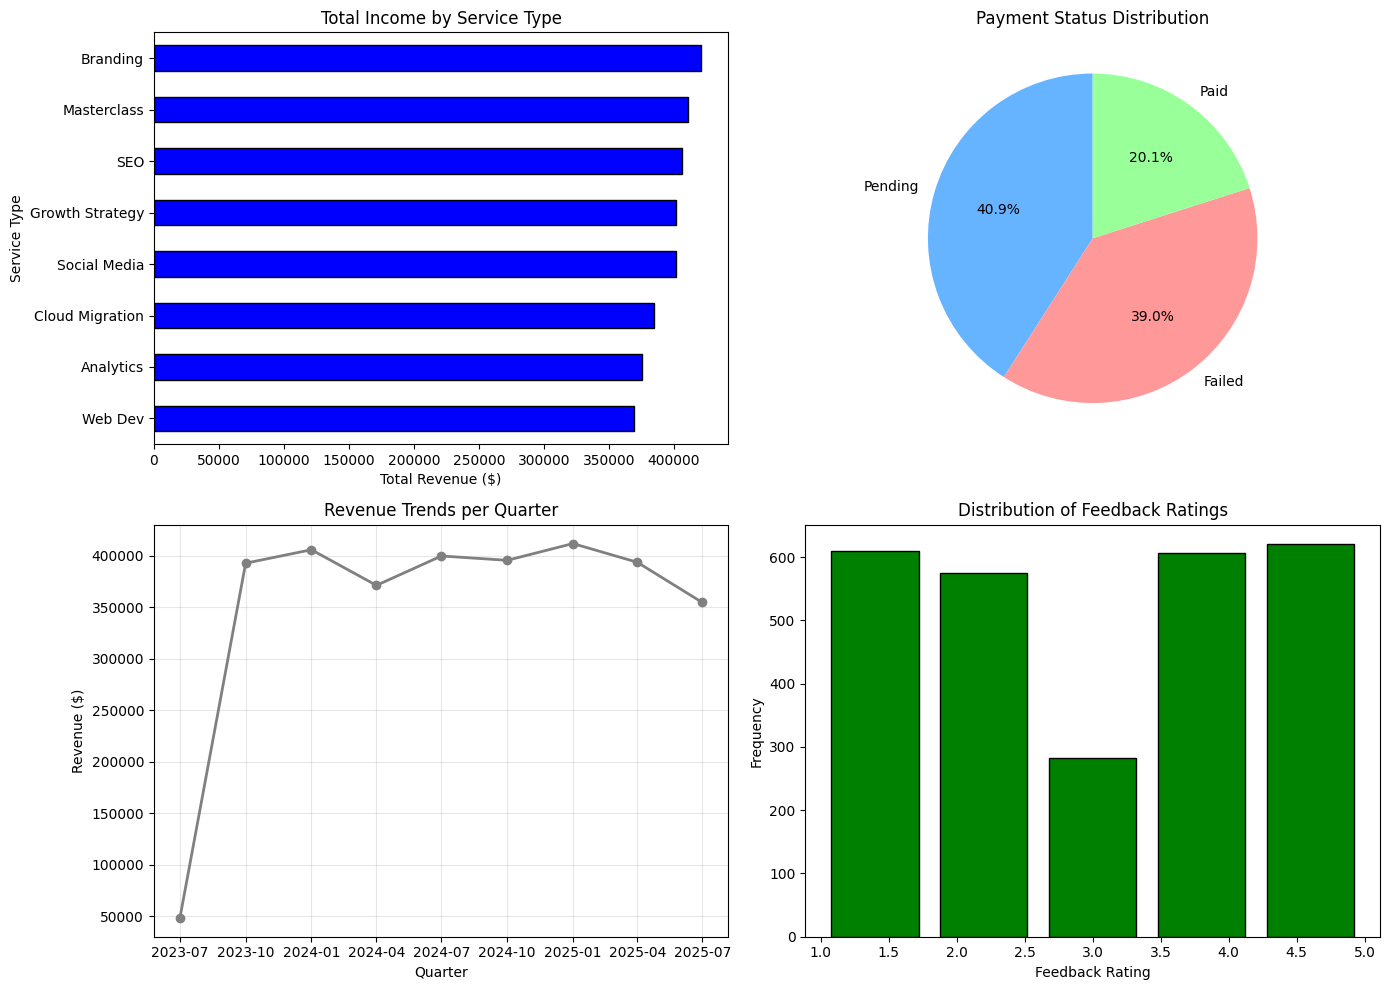

In [44]:
#combined charts
import matplotlib.pyplot as plt

# --- 1. Bar Chart: Total Income by Service Type ---
service_income = df.groupby('Service_Type')['Fee_Charged'].sum().sort_values()

# --- 2. Pie Chart: Payment Status Distribution ---
payment_dist = df['Payment_Status'].value_counts()

# --- 3. Line Chart: Revenue Trends per Quarter ---
revenue_trends = df.groupby(df['Txn_Date'].dt.to_period('Q'))['Fee_Charged'].sum()
revenue_trends.index = revenue_trends.index.to_timestamp()

# --- 4. Histogram: Feedback Ratings ---
ratings = df['Feedback_Rating']

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1 - Bar Chart
service_income.plot(kind='barh', color='blue', edgecolor='black', ax=axes[0,0])
axes[0,0].set_title("Total Income by Service Type")
axes[0,0].set_xlabel("Total Revenue ($)")
axes[0,0].set_ylabel("Service Type")

# Plot 2 - Pie Chart
payment_dist.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                  colors=['#66b3ff','#ff9999','#99ff99'], ax=axes[0,1])
axes[0,1].set_title("Payment Status Distribution")
axes[0,1].set_ylabel("")  # hide y-label

# Plot 3 - Line Chart
axes[1,0].plot(revenue_trends.index, revenue_trends.values, marker='o', linewidth=2, color='grey')
axes[1,0].set_title("Revenue Trends per Quarter")
axes[1,0].set_xlabel("Quarter")
axes[1,0].set_ylabel("Revenue ($)")
axes[1,0].grid(alpha=0.3)

# Plot 4 - Histogram
axes[1,1].hist(ratings, bins=5, rwidth=0.8, color='green', edgecolor='black')
axes[1,1].set_title("Distribution of Feedback Ratings")
axes[1,1].set_xlabel("Feedback Rating")
axes[1,1].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()


In [45]:
df

,Partner_ID,Partner_Name,Intern_ID,Intern_Name,Intern_Assigned_To,Service_Type,Fee_Charged,Payment_Status,Country,Start_Date,End_Date,Intern_Hours,Feedback_Rating,Txn_Date,Quarter
0,P001,CloudSoft,I1000,Nathan Stevens,CloudSoft,Branding,799.0,Paid,Nigeria,2025-04-02,2025-08-28,398.0,3.0,2025-04-02,2025Q2
1,P005,CloudSoft,I1001,Mario Alvarez,CloudSoft,Masterclass,1621.0,Pending,USA,2024-08-26,2025-06-25,91.0,2.0,2024-08-26,2024Q3
2,P003,Alpha Tech,I1002,Shane Fuller,Alpha Tech,Masterclass,1718.0,Failed,Canada,2025-05-18,2025-12-15,88.0,4.0,2025-05-18,2025Q2
3,P008,EcoTrans,I1003,Nicholas West,EcoTrans,Analytics,995.0,Paid,Canada,2025-04-24,2025-11-22,482.5,4.0,2025-04-24,2025Q2
4,P004,Betta Ltd.,I1004,Matthew Harper,Betta Ltd.,Web Dev,1568.0,Failed,Nigeria,2023-10-06,2025-07-21,686.0,5.0,2023-10-06,2023Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,P002,Nova Systems,I3995,Matthew Graves,Nova Systems,Growth Strategy,1329.0,Failed,UK,2024-01-19,2024-04-25,268.0,3.0,2024-01-19,2024Q1
2996,P007,TechBridge,I3996,Joe Newman,TechBridge,Branding,1558.0,Failed,UK,2024-04-09,2025-10-08,1081.0,2.0,2024-04-09,2024Q2
2997,P003,Betta Ltd.,I3997,Glenn Chaney,Betta Ltd.,Branding,1288.0,Pending,UK,2023-10-23,2025-12-06,821.0,1.0,2023-10-23,2023Q4
2998,P001,Betta Ltd.,I3998,Jon Burke,Betta Ltd.,Cloud Migration,1079.0,Pending,UK,2024-11-19,2025-08-20,1068.0,4.0,2024-11-19,2024Q4


In [46]:
 # Save cleaned DataFrame to CSV
df.to_csv('cleaned_internflare_data.csv', index=False)


In [47]:
df

,Partner_ID,Partner_Name,Intern_ID,Intern_Name,Intern_Assigned_To,Service_Type,Fee_Charged,Payment_Status,Country,Start_Date,End_Date,Intern_Hours,Feedback_Rating,Txn_Date,Quarter
0,P001,CloudSoft,I1000,Nathan Stevens,CloudSoft,Branding,799.0,Paid,Nigeria,2025-04-02,2025-08-28,398.0,3.0,2025-04-02,2025Q2
1,P005,CloudSoft,I1001,Mario Alvarez,CloudSoft,Masterclass,1621.0,Pending,USA,2024-08-26,2025-06-25,91.0,2.0,2024-08-26,2024Q3
2,P003,Alpha Tech,I1002,Shane Fuller,Alpha Tech,Masterclass,1718.0,Failed,Canada,2025-05-18,2025-12-15,88.0,4.0,2025-05-18,2025Q2
3,P008,EcoTrans,I1003,Nicholas West,EcoTrans,Analytics,995.0,Paid,Canada,2025-04-24,2025-11-22,482.5,4.0,2025-04-24,2025Q2
4,P004,Betta Ltd.,I1004,Matthew Harper,Betta Ltd.,Web Dev,1568.0,Failed,Nigeria,2023-10-06,2025-07-21,686.0,5.0,2023-10-06,2023Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,P002,Nova Systems,I3995,Matthew Graves,Nova Systems,Growth Strategy,1329.0,Failed,UK,2024-01-19,2024-04-25,268.0,3.0,2024-01-19,2024Q1
2996,P007,TechBridge,I3996,Joe Newman,TechBridge,Branding,1558.0,Failed,UK,2024-04-09,2025-10-08,1081.0,2.0,2024-04-09,2024Q2
2997,P003,Betta Ltd.,I3997,Glenn Chaney,Betta Ltd.,Branding,1288.0,Pending,UK,2023-10-23,2025-12-06,821.0,1.0,2023-10-23,2023Q4
2998,P001,Betta Ltd.,I3998,Jon Burke,Betta Ltd.,Cloud Migration,1079.0,Pending,UK,2024-11-19,2025-08-20,1068.0,4.0,2024-11-19,2024Q4


In [58]:
df["Partner_Name"].value_counts()


Partner_Name
InfinitX        333
Betta Ltd.      327
Nova Systems    314
CloudSoft       309
Green Energy    306
TechBridge      301
Skyline Inc.    297
EcoTrans        286
Alpha Tech      272
DataCore        255
Name: count, dtype: int64

In [60]:
df["Country"].value_counts()

Country
Nigeria    890
UK         635
USA        595
Canada     576
Germany    304
Name: count, dtype: int64